In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Question 1

 #### note: some parts of the code below involve unit conversions from imperial units to SI units...the reason I do that is Dr.Woodard's lecture notes use only SI units but LabView records data in imperial units, which is quite annoyuing

In [3]:
df = pd.read_csv('lab1_data',delimiter = ',',skiprows=1)

In [4]:
df.head()

,Data Point #,Motor Speed [RPM],Manometer delta P [dpsi],Ambient Temp.[R],Viscosity [slug/ft s],Ambient Press. [psia],Omega Transmitter delta P [dpsi],RakeT1 [psid],RakeT2 [psid],RakeT3 [psid],...,RakeT5 [psid],RakeT6 [psid],RakeT7 [psid],RakeT8 [psid],RakeT9 [psid],RakeS1 [psid],RakeS2 [psid],RakeS3 [psid],RakeS4 [psid],RakeS5 [psid]
0,1.0,400.0,0.005780,540.27,3.856930e-07,14.22862,0.005581,0.004678,0.004670,0.004730,...,0.004747,0.004824,0.004778,0.004714,0.004683,0.000079,0.000135,0.000046,0.000050,0.000007
1,2.0,500.0,0.008671,540.27,3.856930e-07,14.22862,0.008935,0.007642,0.007608,0.007689,...,0.007712,0.007830,0.007671,0.007596,0.007516,0.000131,0.000209,0.000063,0.000091,0.000068
2,3.0,600.0,0.013006,540.27,3.856930e-07,14.22862,0.013304,0.011529,0.011420,0.011549,...,0.011612,0.011724,0.011529,0.011484,0.011376,0.000142,0.000235,0.000072,0.000181,0.000030
3,4.0,700.0,0.018064,540.27,3.856930e-07,14.22862,0.018328,0.016409,0.016146,0.016332,...,0.016460,0.016625,0.016314,0.016307,0.016180,0.000249,0.000370,0.000129,0.000212,0.000097
4,5.0,800.0,0.023844,540.27,3.856930e-07,14.22862,0.023865,0.021370,0.021158,0.021298,...,0.021474,0.021649,0.021264,0.021263,0.021105,0.000304,0.000417,0.000153,0.000225,0.000106


In [5]:
df.columns

Index(['Data Point #', ' Motor Speed [RPM]', ' Manometer delta P [dpsi]',
       ' Ambient Temp.[R]', ' Viscosity [slug/ft s]', ' Ambient Press. [psia]',
       ' Omega Transmitter delta P [dpsi]', ' RakeT1 [psid]', 'RakeT2 [psid]',
       'RakeT3 [psid]', 'RakeT4 [psid]', 'RakeT5 [psid]', 'RakeT6 [psid]',
       'RakeT7 [psid]', 'RakeT8 [psid]', 'RakeT9 [psid]', 'RakeS1 [psid]',
       'RakeS2 [psid]', 'RakeS3 [psid]', 'RakeS4 [psid]', 'RakeS5 [psid]'],
      dtype='object')

In [6]:
df['avg_tot_pressure(psia)'] = (df[' RakeT1 [psid]']+df['RakeT2 [psid]']+df['RakeT3 [psid]']+df['RakeT4 [psid]']+df['RakeT5 [psid]']+\
            df['RakeT6 [psid]']+df['RakeT7 [psid]']+df['RakeT8 [psid]']+df['RakeT9 [psid]'])/9

In [7]:
df['avg_stat_pressure(psia)'] = (df['RakeS1 [psid]']+df['RakeS2 [psid]']+df['RakeS3 [psid]']+df['RakeS4 [psid]']+df['RakeS5 [psid]'])/5

In [8]:
df['q_actual(psia)'] = df['avg_tot_pressure(psia)']-df['avg_stat_pressure(psia)']
                                        

In [9]:
df['q_actual(psia)']

0     0.004667
1     0.007551
2     0.011401
3     0.016144
4     0.021091
5     0.026670
6     0.034644
7     0.041690
8     0.048155
9     0.057718
10    0.067336
Name: q_actual(psia), dtype: float64

In [10]:
table = df[['Data Point #',' Motor Speed [RPM]','avg_tot_pressure(psia)','avg_stat_pressure(psia)','q_actual(psia)']]

In [11]:
table.set_index('Data Point #')

,Motor Speed [RPM],avg_tot_pressure(psia),avg_stat_pressure(psia),q_actual(psia)
Data Point #,,,,
1.0,400.0,0.004730,0.000063,0.004667
2.0,500.0,0.007663,0.000112,0.007551
3.0,600.0,0.011533,0.000132,0.011401
4.0,700.0,0.016355,0.000212,0.016144
5.0,800.0,0.021332,0.000241,0.021091
6.0,900.0,0.027001,0.000331,0.026670
7.0,1000.0,0.034970,0.000326,0.034644
8.0,1100.0,0.042159,0.000468,0.041690
9.0,1200.0,0.048591,0.000436,0.048155


In [12]:
table.to_excel('table.xlsx')

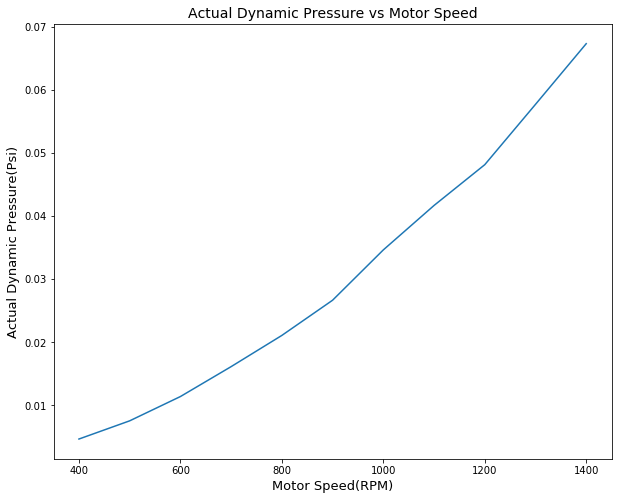

In [13]:
plt.figure(figsize=(10,8));
sns.lineplot(x=' Motor Speed [RPM]',y='q_actual(psia)',data=table);
plt.title('Actual Dynamic Pressure vs Motor Speed',fontsize=14)
plt.xlabel('Motor Speed(RPM)',fontsize=13);
plt.ylabel('Actual Dynamic Pressure(Psi)',fontsize=13);
plt.savefig('q_actual vs Motorspeed')

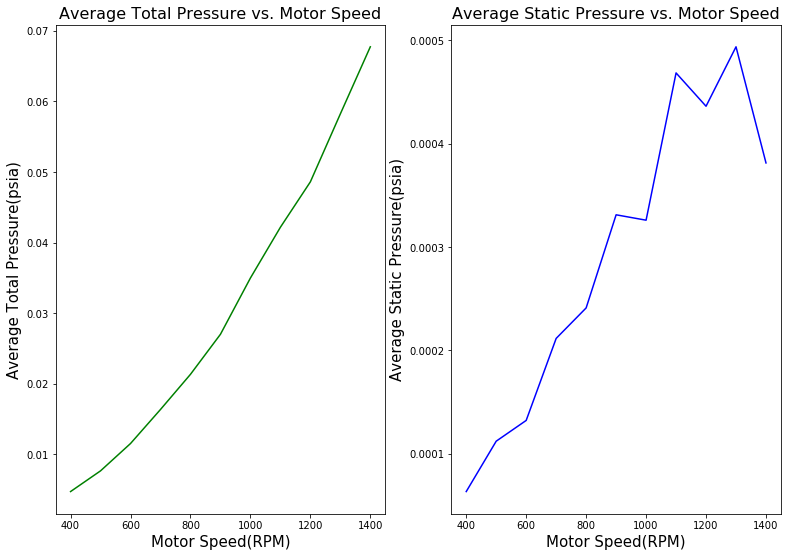

In [14]:
plt.figure(figsize=(13,9));
plt.subplot(1,2,1);
sns.lineplot(x=' Motor Speed [RPM]',y='avg_tot_pressure(psia)',data=table,color='g');
plt.xlabel('Motor Speed(RPM)',fontsize=15);
plt.ylabel('Average Total Pressure(psia)',fontsize=15);
plt.title('Average Total Pressure vs. Motor Speed',fontsize=16)
plt.subplot(1,2,2);
sns.lineplot(x=' Motor Speed [RPM]',y='avg_stat_pressure(psia)',data=table,color='b')
plt.xlabel('Motor Speed(RPM)',fontsize=15);
plt.ylabel('Average Static Pressure(psia)',fontsize=15);
plt.title('Average Static Pressure vs. Motor Speed',fontsize=16)

plt.savefig('Pressure vs motor speed')

### Question 2

In [15]:
df[' Ambient Press. [psia]'].unique()

array([14.22862])

In [16]:
# mass-specific gas constant for air is 1717( ... ) in imperial unit!!!!
#density is in slug/ft^3
#pressure is to be converted to lb/ft^2 instead of psi

#use ideal gas law to calculate the density:
df['density(slug/ft^3)'] = (14.22862*144)/(1717*df[' Ambient Temp.[R]']) #UNIT CONVERSION!!!!!

#use dynamic pressure relation to calculate the actual velocity
df['actual_velocity(ft/s)'] =np.sqrt( 2*df['q_actual(psia)']*144/df['density(slug/ft^3)'] )
#velocity is in ft/s

In [17]:
#Reynold's number with no length scale:

df['Re'] = df['density(slug/ft^3)']*df['actual_velocity(ft/s)']/df[' Viscosity [slug/ft s]']


In [18]:
#Mach number: Ma = V/a
# a = sqrt(gamma*R*T)
df['sound_speed(ft/s)'] = np.sqrt(1.4*1717*df[' Ambient Temp.[R]'])

df['Mach number'] = df['actual_velocity(ft/s)']/df['sound_speed(ft/s)']


In [19]:
table2= df[['Data Point #', ' Motor Speed [RPM]','q_actual(psia)','actual_velocity(ft/s)','Re','Mach number']]

In [20]:
table2.set_index('Data Point #')

,Motor Speed [RPM],q_actual(psia),actual_velocity(ft/s),Re,Mach number
Data Point #,,,,,
1.0,400.0,0.004667,24.667552,141263.000028,0.021646
2.0,500.0,0.007551,31.378698,179695.534132,0.027535
3.0,600.0,0.011401,38.556432,220800.070267,0.033833
4.0,700.0,0.016144,45.880007,262739.789090,0.040260
5.0,800.0,0.021091,52.441622,300316.011429,0.046017
6.0,900.0,0.026670,58.970703,337705.919008,0.051747
7.0,1000.0,0.034644,67.210885,384894.748170,0.058977
8.0,1100.0,0.041690,73.729729,422226.029274,0.064698
9.0,1200.0,0.048155,79.240379,453783.720571,0.069533


In [21]:
table2.to_excel('table2.xlsx')

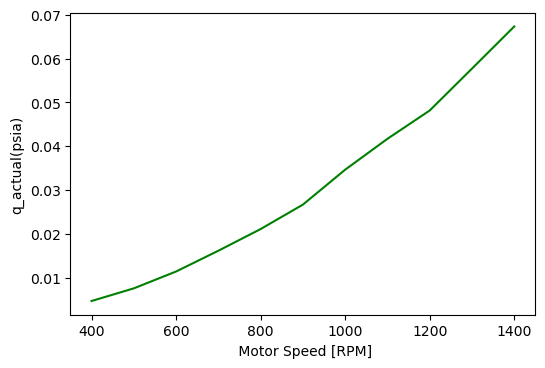

In [22]:
plt.figure(dpi=100)
sns.lineplot(x=' Motor Speed [RPM]',y='q_actual(psia)',data=df,color='g');


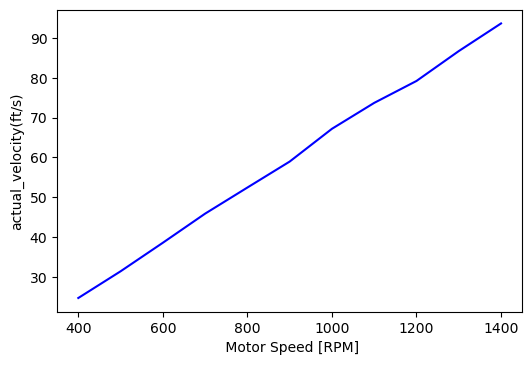

In [23]:
plt.figure(dpi=100);
sns.lineplot(x=' Motor Speed [RPM]',y='actual_velocity(ft/s)',data=df,color='b')

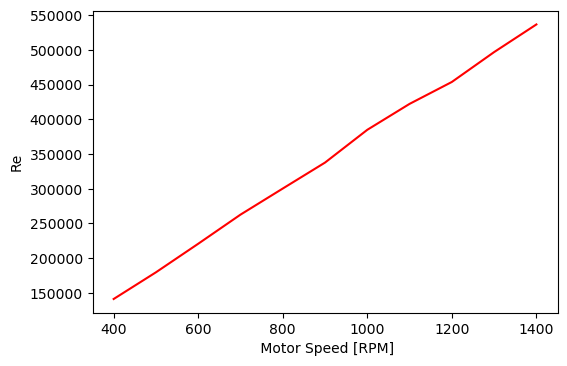

In [24]:
plt.figure(dpi=100)
sns.lineplot(x=' Motor Speed [RPM]',y='Re',data=df,color='r')

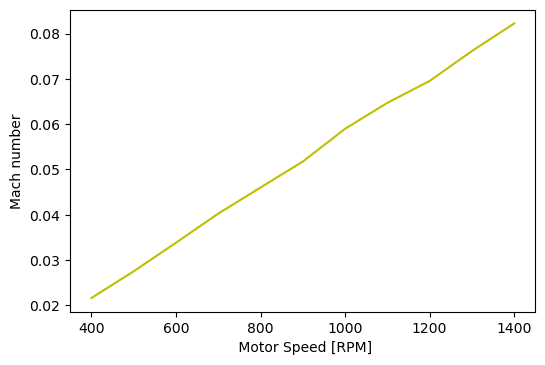

In [25]:
plt.figure(dpi=100)
sns.lineplot(x=' Motor Speed [RPM]',y='Mach number',data=df,color='y')

### Question 3

#### Part a

In [26]:
df['tot_pressure_var1'] = (df[' RakeT1 [psid]']-df['avg_tot_pressure(psia)'])/df['q_actual(psia)'] * 100 
df['tot_pressure_var2'] = (df['RakeT2 [psid]']-df['avg_tot_pressure(psia)'])/df['q_actual(psia)'] * 100 
df['tot_pressure_var3'] = (df['RakeT3 [psid]']-df['avg_tot_pressure(psia)'])/df['q_actual(psia)'] * 100 
df['tot_pressure_var4'] = (df['RakeT4 [psid]']-df['avg_tot_pressure(psia)'])/df['q_actual(psia)'] * 100 
df['tot_pressure_var5'] = (df['RakeT5 [psid]']-df['avg_tot_pressure(psia)'])/df['q_actual(psia)'] * 100 
df['tot_pressure_var6'] = (df['RakeT6 [psid]']-df['avg_tot_pressure(psia)'])/df['q_actual(psia)'] * 100 
df['tot_pressure_var7'] = (df['RakeT7 [psid]']-df['avg_tot_pressure(psia)'])/df['q_actual(psia)'] * 100 
df['tot_pressure_var8'] = (df['RakeT8 [psid]']-df['avg_tot_pressure(psia)'])/df['q_actual(psia)'] * 100 
df['tot_pressure_var9'] = (df['RakeT9 [psid]']-df['avg_tot_pressure(psia)'])/df['q_actual(psia)'] * 100 

#results are in percentage

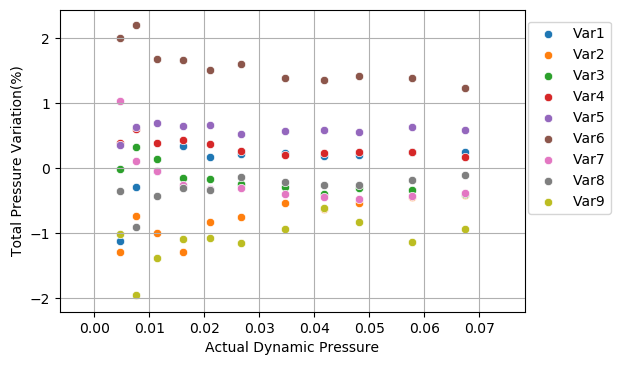

In [27]:
plt.figure(dpi=100);
sns.scatterplot(x=df['q_actual(psia)'],y=df['tot_pressure_var1'],label='Var1')
sns.scatterplot(x=df['q_actual(psia)'],y=df['tot_pressure_var2'],label='Var2')
sns.scatterplot(x=df['q_actual(psia)'],y=df['tot_pressure_var3'],label='Var3')
sns.scatterplot(x=df['q_actual(psia)'],y=df['tot_pressure_var4'],label='Var4')
sns.scatterplot(x=df['q_actual(psia)'],y=df['tot_pressure_var5'],label='Var5')
sns.scatterplot(x=df['q_actual(psia)'],y=df['tot_pressure_var6'],label='Var6')
sns.scatterplot(x=df['q_actual(psia)'],y=df['tot_pressure_var7'],label='Var7')
sns.scatterplot(x=df['q_actual(psia)'],y=df['tot_pressure_var8'],label='Var8')
sns.scatterplot(x=df['q_actual(psia)'],y=df['tot_pressure_var9'],label='Var9')
plt.legend(loc='lower right', bbox_to_anchor=(1.2,0.3))
plt.grid()
plt.ylabel('Total Pressure Variation(%)')
plt.xlabel('Actual Dynamic Pressure');

#### Part b

In [28]:
df['stat_pressure_var1'] = (df['RakeS1 [psid]']-df['avg_stat_pressure(psia)'])/df['q_actual(psia)'] * 100 
df['stat_pressure_var2'] = (df['RakeS2 [psid]']-df['avg_stat_pressure(psia)'])/df['q_actual(psia)'] * 100 
df['stat_pressure_var3'] = (df['RakeS3 [psid]']-df['avg_stat_pressure(psia)'])/df['q_actual(psia)'] * 100 
df['stat_pressure_var4'] = (df['RakeS4 [psid]']-df['avg_stat_pressure(psia)'])/df['q_actual(psia)'] * 100 
df['stat_pressure_var5'] = (df['RakeS5 [psid]']-df['avg_stat_pressure(psia)'])/df['q_actual(psia)'] * 100 


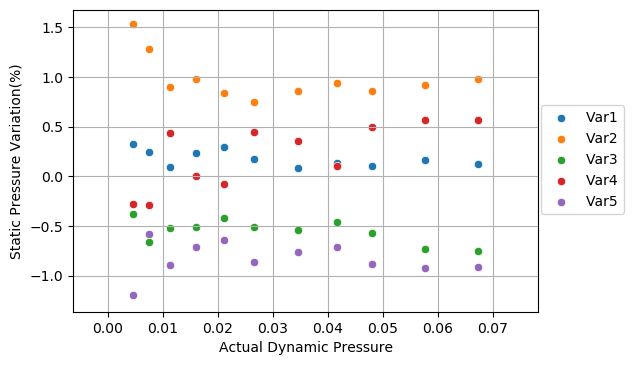

In [29]:
plt.figure(dpi=100);
sns.scatterplot(x=df['q_actual(psia)'],y=df['stat_pressure_var1'],label='Var1')
sns.scatterplot(x=df['q_actual(psia)'],y=df['stat_pressure_var2'],label='Var2')
sns.scatterplot(x=df['q_actual(psia)'],y=df['stat_pressure_var3'],label='Var3')
sns.scatterplot(x=df['q_actual(psia)'],y=df['stat_pressure_var4'],label='Var4')
sns.scatterplot(x=df['q_actual(psia)'],y=df['stat_pressure_var5'],label='Var5')
plt.legend(loc='lower right', bbox_to_anchor=(1.2,0.3))
plt.grid()

plt.ylabel('Static Pressure Variation(%)')
plt.xlabel('Actual Dynamic Pressure');

### Question 4

In [30]:
df['percent_diff_actual_Omega'] =( np.abs(df['q_actual(psia)']-df[' Omega Transmitter delta P [dpsi]'])/df[' Omega Transmitter delta P [dpsi]'])*100

df['percent_diff_actual_Dwyer'] =( np.abs(df['q_actual(psia)']-df[' Manometer delta P [dpsi]'])/df[' Manometer delta P [dpsi]'])*100

table4 = df[['Data Point #',' Motor Speed [RPM]','q_actual(psia)',' Omega Transmitter delta P [dpsi]',\
            'percent_diff_actual_Omega', ' Manometer delta P [dpsi]','percent_diff_actual_Dwyer']]

In [31]:
table4.set_index('Data Point #')

,Motor Speed [RPM],q_actual(psia),Omega Transmitter delta P [dpsi],percent_diff_actual_Omega,Manometer delta P [dpsi],percent_diff_actual_Dwyer
Data Point #,,,,,,
1.0,400.0,0.004667,0.005581,16.384748,0.005780,19.268866
2.0,500.0,0.007551,0.008935,15.483748,0.008671,12.910157
3.0,600.0,0.011401,0.013304,14.301762,0.013006,12.340250
4.0,700.0,0.016144,0.018328,11.917539,0.018064,10.631211
5.0,800.0,0.021091,0.023865,11.621834,0.023844,11.546037
6.0,900.0,0.026670,0.030136,11.500709,0.031070,14.161300
7.0,1000.0,0.034644,0.039013,11.198091,0.039018,11.209926
8.0,1100.0,0.041690,0.047011,11.317397,0.046966,11.233144
9.0,1200.0,0.048155,0.054368,11.427340,0.054914,12.308318


In [32]:
table4.to_excel('table4.xlsx')

### Question 5

In [33]:
# 1st method: use linear regression

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression()

In [36]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : returns an instance of self.



In [37]:
X = np.array(df[' Omega Transmitter delta P [dpsi]']).reshape(-1,1)
y = np.array(df['q_actual(psia)']).reshape(-1,1)

In [38]:
model.fit(X,y)

LinearRegression()

In [39]:
model.coef_

#this is the calibration coefficinet --> the slope of the linear regression equation!


array([[0.90677787]])

In [40]:
model.intercept_

array([-0.00061765])

In [41]:
model.score(X,y) 

# as we can see the R^2 value is pretty close to 1

0.9996535628291885

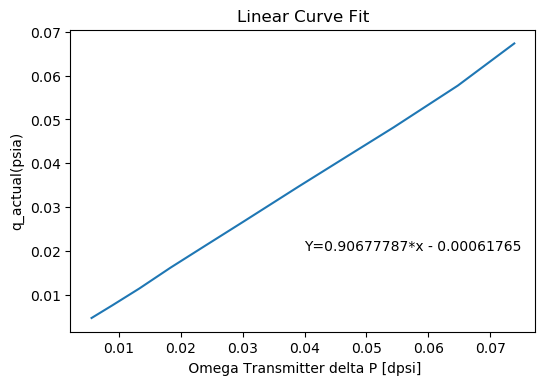

In [42]:
plt.figure(dpi=100)
sns.lineplot(x=df[' Omega Transmitter delta P [dpsi]'],y=df['q_actual(psia)'],data=df)
plt.annotate('Y=0.90677787*x - 0.00061765',xy=(0.04,0.02),xycoords='data')
plt.title('Linear Curve Fit');

In [43]:
# 2nd method: use PolyFit function in Numpy

In [44]:
f = np.polyfit(X.flatten(),y.flatten(),1)

In [45]:
f

array([ 9.06777875e-01, -6.17654531e-04])

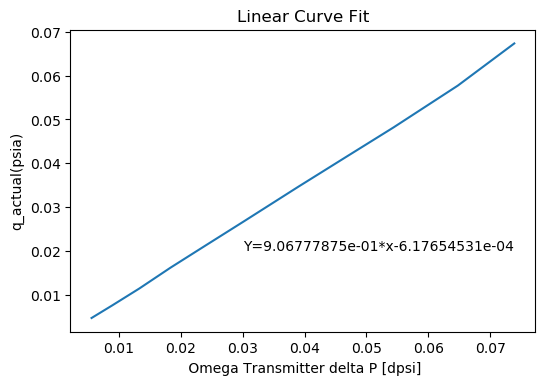

In [46]:
plt.figure(dpi=100)
sns.lineplot(x=df[' Omega Transmitter delta P [dpsi]'],y=df['q_actual(psia)'],data=df)
plt.annotate('Y=9.06777875e-01*x-6.17654531e-04',xy=(0.03,0.02),xycoords='data')
plt.title('Linear Curve Fit');

### Question 6

In [47]:
import sympy as sym
from sympy import diff

In [48]:
# define velocity in terms of P,P0,rho

P,P0,rho = sym.symbols('P,P0,rho')

In [49]:
V = sym.sqrt(2*(P0-P)/rho)

In [50]:
V

sqrt((-2*P + 2*P0)/rho)

In [51]:
V_diff_P0 = diff(V,P0)
V_diff_P0

sqrt((-2*P + 2*P0)/rho)/(-2*P + 2*P0)

In [52]:
V_diff_P = diff(V,P)
V_diff_P

-sqrt((-2*P + 2*P0)/rho)/(-2*P + 2*P0)

In [53]:
V_diff_rho = diff(V,rho)
V_diff_rho

-sqrt((-2*P + 2*P0)/rho)/(2*rho)

1.RSS Uncertainty equation for actual velocity:
$U_{\text {Vactual }}=\sqrt{\left(\frac{\partial V}{\partial p_{o}} U_{p_{o}}\right)^{2}+\left(\frac{\partial V}{\partial p_{s}} U_{p_{s}}\right)^{2}+\left(\frac{\partial V}{\partial \rho} U_{\rho}\right)^{2}}$

2.Uncertainty in density :
$U_{\rho}=\sqrt{\left(\frac{\partial \rho}{\partial p_{a m b}} U_{p_{a m b}}\right)^{2}+\left(\frac{\partial \rho}{\partial R} U_{R}\right)^{2}+\left(\frac{\partial \rho}{\partial T_{a m b}} U_{T_{a m b}}\right)^{2}}$

3.Uncertainty in pressure:
$U_{p}=\sqrt{\left(1 / n_{p 1}\right)^{2}+\left(1 / n_{p 2}\right)^{2}+\left(1 / n U_{p 3}\right)^{2}+\ldots+\left(1 / n U_{p n}\right)^{2}}$

$\left(U_{P_{0}}\right)_{\text {single }}=\left(U_{P}\right)_{\text {single }}=0.001 \times 1 \mathrm{psi}=0.001 \mathrm{psi}=6.89 \mathrm{~Pa}$

$U_{P}=\sqrt{\frac{\left(U_{P}\right)_{\text {single }}^{2}}{n}}$

In [54]:
#therefore,
U_P0 = 2.3
U_P = 3.08

$U_{P_{amb}}=0.148^{\prime \prime} H g=500 P a$


$U_{T_{amb}}= 1.8 F =256.372 Kelvin $

In [55]:
#Use ideal gas law to take partial derivatives of rho with respect to R,T,and P
# P = rho*R*T

P_amb,R,T_amb = sym.symbols('P_amb,R,T_amb')
RHO = P_amb/(R*T_amb)

In [56]:
RHO_diff_P = diff(RHO,P_amb)
RHO_diff_T = diff(RHO,T_amb)

In [57]:
RHO_diff_P

1/(R*T_amb)

In [58]:
RHO_diff_T

-P_amb/(R*T_amb**2)

In [59]:
#assuming uncertainty in R = 0, let's evaluate equation NO.2:

uncertainty_rho = sym.sqrt((RHO_diff_P*500)**2+0+(RHO_diff_T*256.372)**2)

In [60]:
uncertainty_rho

500*sqrt(0.262906409536*P_amb**2/(R**2*T_amb**4) + 1/(R**2*T_amb**2))

In [61]:
uncertainty_rho_numeric = sym.lambdify((R,T_amb,P_amb),uncertainty_rho)

R = 287 #IS units
T_amb = 300.15 #Kelvin
P_amb = 98102.88 #pascal
rho_amb = P_amb/(R*T_amb)
#The numbers above come from the previously constructed experimental data table, 'df'

In [62]:
uncertainty_rho_numeric(R,T_amb,P_amb)
#This is the numeric result of equation NO.2

0.9727505562406977

In [63]:
#Now let's evaluate equation NO.1:
uncertainty_V = sym.sqrt((V_diff_P0*U_P0)**2+(V_diff_P*U_P)**2+(V_diff_rho*uncertainty_rho_numeric(R,T_amb,P_amb))**2)
uncertainty_V

3.8440083246528*sqrt(1/(rho*(-2*P + 2*P0)) + 0.0160093738100381*(-2*P + 2*P0)/rho**3)

In [64]:
uncertainty_V_numeric = sym.lambdify((P,P0,rho),uncertainty_V)

In [65]:
#now convert units to IS units

In [66]:
df['avg_stat_pressure(Pa)']=df['avg_stat_pressure(psia)']*6894.76

In [67]:
df['avg_tot_pressure(Pa)']=df['avg_tot_pressure(psia)']*6894.76

In [68]:
uncertainty_V_list = []

for i in range(0,len(df['avg_stat_pressure(Pa)'])):
    uncertainty_V_list.append(uncertainty_V_numeric(df['avg_stat_pressure(Pa)'][i],
                                                    df['avg_tot_pressure(Pa)'][i],
                                                    rho_amb))

In [69]:
df['uncertainty_velocity(m/s)'] = uncertainty_V_list

In [84]:
percent_uncertainty_V_list = []
v_j_list = []
for j in range(0,len(df['avg_stat_pressure(Pa)'])):
    v_j = np.sqrt(2*(df['avg_tot_pressure(Pa)'][j]-df['avg_stat_pressure(Pa)'][j])/rho_amb)
    v_j_list.append(v_j)
    percent_uncertainty_V_list.append(uncertainty_V_list[j]/v_j)

In [86]:
df['actual_velocity(m/s)']=v_j_list

In [87]:
percent_uncertainty_V_list

[0.43123806031526746,
 0.42867322951347775,
 0.4277800664807104,
 0.4274296770679674,
 0.42728519787566654,
 0.4272086172108965,
 0.4271565261940185,
 0.4271330725658859,
 0.4271199632617476,
 0.427108041655667,
 0.4271007973167267]

In [88]:
df['percent_uncertainty_velocity(%)'] = percent_uncertainty_V_list

In [89]:
df.columns

Index(['Data Point #', ' Motor Speed [RPM]', ' Manometer delta P [dpsi]',
       ' Ambient Temp.[R]', ' Viscosity [slug/ft s]', ' Ambient Press. [psia]',
       ' Omega Transmitter delta P [dpsi]', ' RakeT1 [psid]', 'RakeT2 [psid]',
       'RakeT3 [psid]', 'RakeT4 [psid]', 'RakeT5 [psid]', 'RakeT6 [psid]',
       'RakeT7 [psid]', 'RakeT8 [psid]', 'RakeT9 [psid]', 'RakeS1 [psid]',
       'RakeS2 [psid]', 'RakeS3 [psid]', 'RakeS4 [psid]', 'RakeS5 [psid]',
       'avg_tot_pressure(psia)', 'avg_stat_pressure(psia)', 'q_actual(psia)',
       'density(slug/ft^3)', 'actual_velocity(ft/s)', 'Re',
       'sound_speed(ft/s)', 'Mach number', 'tot_pressure_var1',
       'tot_pressure_var2', 'tot_pressure_var3', 'tot_pressure_var4',
       'tot_pressure_var5', 'tot_pressure_var6', 'tot_pressure_var7',
       'tot_pressure_var8', 'tot_pressure_var9', 'stat_pressure_var1',
       'stat_pressure_var2', 'stat_pressure_var3', 'stat_pressure_var4',
       'stat_pressure_var5', 'percent_diff_actual_Omega'

In [90]:
table6 = df[['Data Point #',' Motor Speed [RPM]','actual_velocity(m/s)','uncertainty_velocity(m/s)','percent_uncertainty_velocity(%)']]

In [91]:
table6

,Data Point #,Motor Speed [RPM],actual_velocity(m/s),uncertainty_velocity(m/s),percent_uncertainty_velocity(%)
0,1.0,400.0,7.517020,3.241625,0.431238
1,2.0,500.0,9.562128,4.099028,0.428673
2,3.0,600.0,11.749421,5.026168,0.427780
3,4.0,700.0,13.981157,5.975961,0.427430
4,5.0,800.0,15.980698,6.828316,0.427285
5,6.0,900.0,17.970325,7.677078,0.427209
6,7.0,1000.0,20.481382,8.748756,0.427157
7,8.0,1100.0,22.467889,9.596779,0.427133
8,9.0,1200.0,24.147167,10.313737,0.427120
9,10.0,1300.0,26.436134,11.291085,0.427108


In [92]:
table6.set_index('Data Point #')

,Motor Speed [RPM],actual_velocity(m/s),uncertainty_velocity(m/s),percent_uncertainty_velocity(%)
Data Point #,,,,
1.0,400.0,7.517020,3.241625,0.431238
2.0,500.0,9.562128,4.099028,0.428673
3.0,600.0,11.749421,5.026168,0.427780
4.0,700.0,13.981157,5.975961,0.427430
5.0,800.0,15.980698,6.828316,0.427285
6.0,900.0,17.970325,7.677078,0.427209
7.0,1000.0,20.481382,8.748756,0.427157
8.0,1100.0,22.467889,9.596779,0.427133
9.0,1200.0,24.147167,10.313737,0.427120


In [93]:
table6.to_excel('table6.xlsx')

Text(0.5, 1.0, 'Uncertainty in Velocity vs. Actual Velocity')

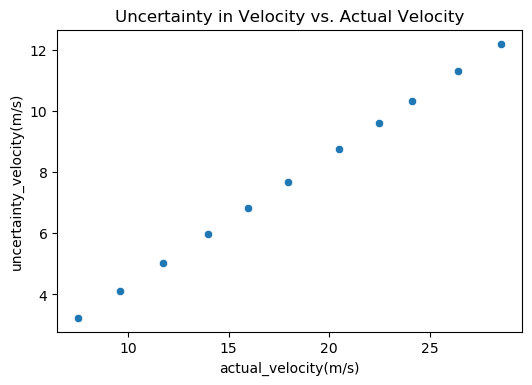

In [94]:
plt.figure(dpi=100);
sns.scatterplot(x='actual_velocity(m/s)',y='uncertainty_velocity(m/s)',data=df)
plt.title('Uncertainty in Velocity vs. Actual Velocity')